In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [122]:
df = pd.read_csv('Travel.csv')

In [123]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Featudre Engineering

## Data Cleaning
-1. Handling Missing Values
-2. Handling Duplicates
-3. Check Data Types
-4. Understand the dataset

In [124]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [125]:
df.Gender.value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [126]:
df.MaritalStatus.value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [127]:
df.TypeofContact.value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [128]:
df.Occupation.value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [129]:
df.ProductPitched.value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [130]:
df.Designation.value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [131]:
## There is Problem in Gender and MaritialStatus Columns

In [132]:
df.Gender = df.Gender.replace('Fe Male','Female')
df.MaritalStatus = df.MaritalStatus.replace('Single','Unmarried')

In [133]:
df.Gender.value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [134]:
df.MaritalStatus.value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [135]:
## Checking Missing Values
## these are the features with nan values.
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]


In [136]:
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% Missing Values')

Age 4.62357 % Missing Values
TypeofContact 0.51146 % Missing Values
DurationOfPitch 5.13502 % Missing Values
NumberOfFollowups 0.92062 % Missing Values
PreferredPropertyStar 0.53191 % Missing Values
NumberOfTrips 2.86416 % Missing Values
NumberOfChildrenVisiting 1.35025 % Missing Values
MonthlyIncome 4.76678 % Missing Values


In [137]:
## statistics on numerical columns
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null values
### Impute Median value for Age column
### Impute Mode for Type of Contract
### Impute Median for Duration of Pitch
### Impute Mode for NumberofFollowup as it is Discrete feature
### Impute Mode for PreferredPropertyStar
### Impute Median for NumberofTrips
### Impute Mode for NumberOfChildrenVisiting
### Impute Median for MonthlyIncome

In [138]:
## age 
df.Age.fillna(df.Age.median(),inplace=True)
## Type Of Contract
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
## Duration of Pitch
## df['DurationOfPitch'] = pd.to_numeric(df['DurationOfPitch'], errors='coerce')
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
## Number of Followup
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
## Preferd Property
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
## Number of Trips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
## Number Of Children Visiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
## Monthly Income
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

/var/folders/37/lfcwt6tj0fg_c56ytzq6yrv80000gn/T/ipykernel_33352/620654737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(),inplace=True)
/var/folders/37/lfcwt6tj0fg_c56ytzq6yrv80000gn/T/ipykernel_33352/620654737.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [139]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [140]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [141]:
df.drop('CustomerID',axis=1,inplace=True)

In [142]:
df.head(3)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0


In [143]:
## Feature Engineering
df['NumberOfChildrenVisiting'] = pd.to_numeric(df['NumberOfChildrenVisiting'], errors='coerce')
df['NumberOfPersonVisiting'] = pd.to_numeric(df['NumberOfPersonVisiting'], errors='coerce')
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [144]:
df.drop('NumberOfChildrenVisiting',axis=1,inplace=True)

In [145]:
## get all the numeric features
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [147]:
df['NumberOfFollowups'] = pd.to_numeric(df['NumberOfFollowups'], errors='coerce')
df['PreferredPropertyStar'] = pd.to_numeric(df['PreferredPropertyStar'], errors='coerce')
df['NumberOfTrips'] = pd.to_numeric(df['NumberOfTrips'], errors='coerce')
df['MonthlyIncome'] = pd.to_numeric(df['MonthlyIncome'], errors='coerce')


In [148]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [149]:
print('Number OF Numerical Columns', len(num_features))
print(num_features)

Number OF Numerical Columns 12
['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']


In [150]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [151]:
print('Number OF Categorical Columns', len(cat_features))
print(cat_features)

Number OF Categorical Columns 6
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [152]:
## discrete Features
dis_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]

In [153]:
print('Number OF Discrete Columns', len(dis_features))
print(dis_features)

Number OF Discrete Columns 9
['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisiting']


In [154]:
continuous_features = [feature for feature in num_features if len(df[feature].unique()) > 25]

In [155]:
print('Number OF Continuous Columns', len(continuous_features))
print(continuous_features)

Number OF Continuous Columns 3
['Age', 'DurationOfPitch', 'MonthlyIncome']


In [156]:
## train Test Split
## do train test split before categorical feature encoding
from sklearn.model_selection import train_test_split
x = df.drop('ProdTaken',axis=1)
y = df['ProdTaken']

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [158]:
x_train.shape, x_test.shape

((3910, 17), (978, 17))

In [159]:
## create column transformer with 3 types of transformers 

In [160]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
   [
        ('StandardScaler', numeric_transformer, num_features),
        ('OneHotEncoder', oh_transformer, cat_features)
   ]
)

In [161]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

## Model Application

In [162]:
!brew install cmake
!pip uninstall xgboost -y
!brew install libomp  # required for parallelism
!CXX=g++ pip install --no-binary xgboost xgboost



==> Downloading https://formulae.brew.sh/api/formula.jws.json
==> Downloading https://formulae.brew.sh/api/cask.jws.json
To reinstall 4.0.1, run:
  brew reinstall cmake
Found existing installation: xgboost 3.0.0
Uninstalling xgboost-3.0.0:
  Successfully uninstalled xgboost-3.0.0
To reinstall 20.1.2, run:
  brew reinstall libomp
  Using cached xgboost-3.0.0-py3-none-macosx_15_0_arm64.whl


In [163]:
import xgboost
print(xgboost.__version__)

3.0.0


In [164]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [165]:
models = {
    'Decesion Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    "Adaboost" : AdaBoostClassifier(),
    # "Gradient Boost" : GradientBoostingClassifier(),
    "XGBoost" : XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    ## make Predicitons
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    ## training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_precesion = precision_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    ## test set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_precesion = precision_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print("Model Performance for Traning Dataset")
    print("Accuracy Score : " ,model_train_accuracy)
    print("f1 Score : " ,model_train_f1)
    print("recall : " ,model_train_recall)
    print("Precesion : " ,model_train_precesion)
    print("ROCAUC Score : " ,model_train_rocauc_score)
    
    print('--------------------------------------------')
    
    print("Model Performance for Test Dataset")
    print("Accuracy Score : " ,model_test_accuracy)
    print("f1 Score : " ,model_test_f1)
    print("recall : " ,model_test_recall)
    print("Precesion : " ,model_test_precesion)
    print("ROCAUC Score : " ,model_test_rocauc_score)
    
    print('='*35)
    print('\n')
    

Decesion Tree
Model Performance for Traning Dataset
Accuracy Score :  1.0
f1 Score :  1.0
recall :  1.0
Precesion :  1.0
ROCAUC Score :  1.0
--------------------------------------------
Model Performance for Test Dataset
Accuracy Score :  0.9171779141104295
f1 Score :  0.7828418230563002
recall :  0.7643979057591623
Precesion :  0.8021978021978022
ROCAUC Score :  0.8593272883306612


Random Forest
Model Performance for Traning Dataset
Accuracy Score :  1.0
f1 Score :  1.0
recall :  1.0
Precesion :  1.0
ROCAUC Score :  1.0
--------------------------------------------
Model Performance for Test Dataset
Accuracy Score :  0.9202453987730062
f1 Score :  0.7515923566878981
recall :  0.6178010471204188
Precesion :  0.959349593495935
ROCAUC Score :  0.8057239034839705


Adaboost
Model Performance for Traning Dataset
Accuracy Score :  0.8478260869565217
f1 Score :  0.3846949327817994
recall :  0.2551440329218107
Precesion :  0.7815126050420168
ROCAUC Score :  0.6193984861245332
----------------

In [169]:
## hyperparameter tuning

rf_params = {
    "max_depth" : [5,8,15,None,10],
    "max_features" : [5,7,'auto',8],
    "min_samples_split" : [2,8,15,20],
    "n_estimators" : [100,200,500,1000]
}
adaboost_params = {
    "n_estimators" : [50,60,70,80,90],
    "algorithm" : ["SAMME","SAMME.R"]
}
grad_params = {
    "loss" : ["log_loss","deviance","exponential"],
    "criterion" : ["friedman_mse","squared_error","mse"],
    "min_samples_split" : [2,8,15,20],
    "n_estimators" : [100,200,500,1000],
    "max_depth" : [5,8,10,15,None]
}

xgboost_params = {
    "learning_rate" : [0.1, 0.01],
    "max_depth" : [5, 8, 12, 20, 30],
    "n_estimators" : [100, 200, 300],
    "colsample_bytree" : [0.5, 0.8, 1, 0.3, 0.4]
}


In [170]:
## Models List For Hyperparameter tuning
randomcv_models = [
    ("RF",RandomForestClassifier(),rf_params),
    # ("Adaboost",AdaBoostClassifier(),adaboost_params),
    # ("GradBoost",GradientBoostingClassifier(),grad_params),
    ("Xgboost",XGBClassifier(),xgboost_params)
]

In [171]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_

for name_model in model_param:
    print("Best Params For : ", model_param[name_model]) 
    

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=200; total time=   0.8s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=a

/Users/vaibhavkale/ML Learnings/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
69 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vaibhavkale/ML Learnings/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vaibhavkale/ML Learnings/venv/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/vaibhavkale/ML Learnings/venv/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_p

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=1,

In [173]:
models = {
    # 'Decesion Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(n_estimators=200,min_samples_leaf=2,
                                             max_features=8,max_depth=15),
    # 'Adaboost' : AdaBoostClassifier(n_estimators= 80, algorithm = 'SAMME'),
    # "Gradboost" : GradientBoostingClassifier(n_estimators=500, min_samples_split= 15, max_depth= 10, loss= 'exponential', criterion='squared_error')
    'XGboost' : XGBClassifier(n_estimators = 300, max_depth= 20, learning_rate= 0.1, colsample_bytree= 0.8)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    ## make Predicitons
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    ## training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_precesion = precision_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    ## test set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_precesion = precision_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print("Model Performance for Traning Dataset")
    print("Accuracy Score : " ,model_train_accuracy)
    print("f1 Score : " ,model_train_f1)
    print("recall : " ,model_train_recall)
    print("Precesion : " ,model_train_precesion)
    print("ROCAUC Score : " ,model_train_rocauc_score)
    
    print('--------------------------------------------')
    
    print("Model Performance for Test Dataset")
    print("Accuracy Score : " ,model_test_accuracy)
    print("f1 Score : " ,model_test_f1)
    print("recall : " ,model_test_recall)
    print("Precesion : " ,model_test_precesion)
    print("ROCAUC Score : " ,model_test_rocauc_score)
    
    print('='*35)
    print('\n')

Random Forest
Model Performance for Traning Dataset
Accuracy Score :  0.991304347826087
f1 Score :  0.9761570827489481
recall :  0.9547325102880658
Precesion :  0.9985652797704447
ROCAUC Score :  0.9772090718683335
--------------------------------------------
Model Performance for Test Dataset
Accuracy Score :  0.9079754601226994
f1 Score :  0.8996113543435652
recall :  0.581151832460733
Precesion :  0.9173553719008265
ROCAUC Score :  0.7842226760778886


XGboost
Model Performance for Traning Dataset
Accuracy Score :  1.0
f1 Score :  1.0
recall :  1.0
Precesion :  1.0
ROCAUC Score :  1.0
--------------------------------------------
Model Performance for Test Dataset
Accuracy Score :  0.9519427402862985
f1 Score :  0.9500417894374582
recall :  0.7853403141361257
Precesion :  0.9615384615384616
ROCAUC Score :  0.8888582129765762




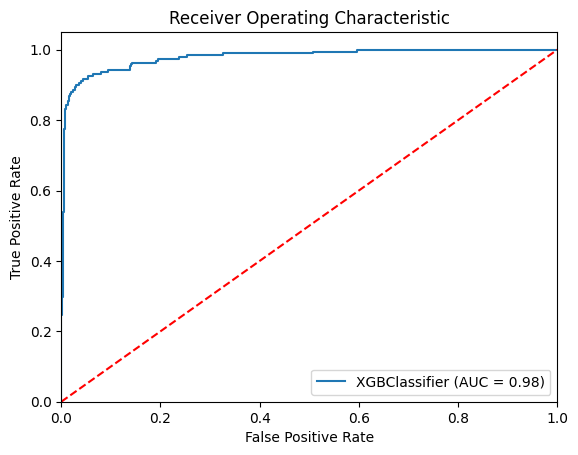

In [175]:
## Plot AUCROC Curve

from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

## add the models to the list that u want to view on the ROC plot

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

auc_models = [
    {
        'label': 'XGBClassifier',
        'model': XGBClassifier(n_estimators = 300, max_depth= 20, learning_rate= 0.1, colsample_bytree= 0.8),
        'auc': 0.604
    },
]

## loop through all the models
for algo in auc_models:
    model = algo['model']
    model.fit(x_train, y_train)

    ## compute false positive and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
    roc_auc = auc(fpr, tpr)  # compute AUC dynamically just in case

    ## plot the ROC curve
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (algo['label'], roc_auc))

## custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()
